


---

**Datos Personales:** 
*   Nombre: Leonardo Gabriel Rikhardsson Barra
*   Rut: 21.104648-1
*   Sección: 6


---

**Profesor de Cátedra:** 
*   Jorge Aguayo

---

**Profesor Auxiliar:** 
*   Gonzalo Salas Viveros

---

**Ayudante de Laboratorio**
*   Diego Olguín Wende

---


# Parte 0: Preámbulos de programación



In [85]:
# Todas las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.integrate import solve_ivp
sns.set_theme()

In [86]:
# Constantes
aS = pow(10, -2)
aH = 7*pow(10, -2)
b1 = 3*pow(10, -2)
b2 = 3*pow(10, -2)
s = 5*pow(10, -4)
p = 5*pow(10, -3)
r = pow(10, -2)
L = pow(10, 2)

# Valores Iniciales
xc0 = pow(10, 2)
y0 = L
a0 = 0


# Funciones auxiliares para calcular los valores de a_c, C_c, C_e, a1 y a2
def ac(p, xc, xe, k):
    return p * (xc + k * xe)

def Cc(s, xc, a, ac, p, xe, k):
    Ac = ac(p, xc, xe, k)
    return s*xc*min(1, a/Ac)

def Ce(s, xc, a, ac, p, xe, k):
    Ac = ac(p, xc, xe, k)
    return k*s*xe*min(1, a/Ac)

def a1(aS, s, xc, aH, a, p, xe, k):
    CC = Cc(s, xc, a, ac, p, xe, k)
    return aS+max(0, 1-CC/(s*xc))*(aH-aS)

def a2(aS, s, xc, aH, a, p, xe, k):
    CE = Ce(s, xc, a, ac, p, xe, k)
    return aS+max(0, 1-CE/(s*xe))*(aH-aS)

# Parte 1: Modelo simplificado a una EDO

Resolveremos el siguiente sistema de ecuaciones diferenciales ordinarias correspondiente a una de las cuatro variables del modelo de humanidad-naturaleza:

\begin{eqnarray*}
\frac{dx_c}{dt}&=&b_1 x_c - a_1 x_c\cr
\end{eqnarray*}

In [87]:
# Constantes definidas por el enunciado
h = 1 #Medido en años

# Condiciones iniciales
xe = 0
a = 250
y = 50

# Valores de D y k escogidos arbitrariamente
k = 1
D = 1

# Todas las constantes que se vayan a utilizar enpaquetada en una lista
args = [aS, aH, b1, b2, s, p, r, L, xe, a, y, k, D]

# Condiciones iniciales empaquetadas en una lista
X0 = [xc0]

## P1.1 Programar función de lado derecho.

In [88]:
# Función del lado derecho
def F1(t,X,args):
    # Desempaquetamiento de las condiciones iniciales y constantes
    xc = X 
    aS, aH, b1, b2, s, p, r, L, xe, a, y, k, D = args

    # Funciones auxiliares necesarias para el calculo de las derivadas
    A1 = a1(aS, s, xc, aH, a, p, xe, k)

    # Calculamos las derivadas
    dxc = b1*xc-A1*xc

    return np.array([dxc])

## P1.2 Implementar los métodos de Euler progresivo, Heun y Runge Kutta de orden 4.

In [89]:
# Función para implementar Euler progresivo.
def Euler_prog(F1,ti,tf,X0,h,args):
    N = int((tf-ti)/h)  

    I = np.linspace(ti,tf,N)  

    X = np.zeros((N,len(X0)))

    X[0] = X0   

    for i in range(N-1):
        X[i+1] = X[i] + h*F1(I[i],X[i],args) 

    return (I,X)

    
# Función para implementar Heun.
def Heun(F1,ti,tf,X0,h,args):
    N = int((tf-ti)/h)  

    I = np.linspace(ti,tf,N)  

    X = np.zeros((N,len(X0)))

    X[0] = X0   

    for i in range(N-1):
        X_tilda = X[i] + h*F1(I[i],X[i],args)
        X[i+1] = X[i] + h/2*(F1(I[i],X[i],args)+F1(X[i+1],X_tilda,args)) 

    return (I,X) 


# Función para implementar Runge Kutta de orden 4.
def RK4(F1,ti,tf,X0,h,args):
    N = int((tf-ti)/h)  

    I = np.linspace(ti,tf,N)  

    X = np.zeros((N,len(X0)))

    X[0] = X0   

    for i in range(N-1):
        g1 = F1(I[i],X[i],args)
        g2 = F1(I[i]+h/2,X[i] + h/2*g1 ,args)
        g3 = F1(I[i]+h/2,X[i] + h/2*g2 ,args)
        g4 = F1(I[i+1],X[i] + h*g3 ,args)

        X[i+1] = X[i] + h/6*(g1 + 2*g2 + 2*g3 + g4)
    return (I,X) 

## P1.3 Calcular y graficar las soluciones de los métodos con h = 1.

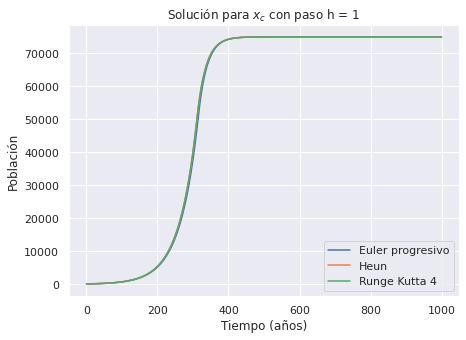

In [90]:
# Solución con Euler progresivo
I_Euler_1, X_Euler_1 = Euler_prog(F1, 0, 1000, X0, h, args)
# Solución con Heun
I_Heun_1, X_Heun_1 = Heun(F1, 0, 1000, X0, h, args)
# Solución con Runge Kutta 4
I_RK4_1, X_RK4_1 = RK4(F1, 0, 1000, X0, h, args)


# Gráfico de las soluciones Euler, Heun y RK4

# Tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
plt.plot(I_Euler_1,X_Euler_1[:,0], label="Euler progresivo")
plt.plot(I_Heun_1,X_Heun_1[:,0], label="Heun")
plt.plot(I_RK4_1,X_RK4_1[:,0], label="Runge Kutta 4")

# Título
plt.title("Solución para $x_c$ con paso h = 1")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

## P1.4 Calcular y graficar nuevamente las soluciones de los métodos, ahora con pasos $2^{-1}$ y $2^{-2}$.

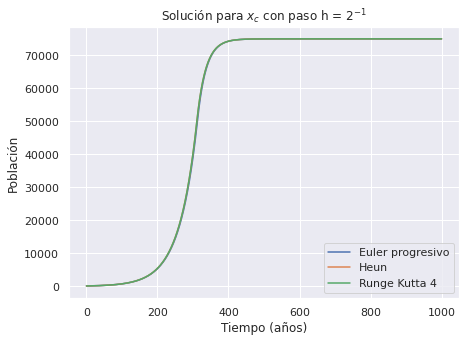

In [91]:
# Nuevos valores para h
h2 = pow(2, -1)
h3 = pow(2, -2)

# Solución con Euler progresivo y paso h2
I_Euler_2, X_Euler_2 = Euler_prog(F1, 0, 1000, X0, h2, args)
# Solución con Heun y paso h2
I_Heun_2, X_Heun_2 = Heun(F1, 0, 1000, X0, h2, args)
# Solución con Runge Kutta 4 y paso h2
I_RK4_2, X_RK4_2 = RK4(F1, 0, 1000, X0, h2, args)


# Gráfico de las soluciones Euler, Heun y RK4 con paso h2

# Tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
plt.plot(I_Euler_2,X_Euler_2[:,0], label="Euler progresivo")
plt.plot(I_Heun_2,X_Heun_2[:,0], label="Heun")
plt.plot(I_RK4_2,X_RK4_2[:,0], label="Runge Kutta 4")

# Título
plt.title("Solución para $x_c$ con paso h = $2^{-1}$")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

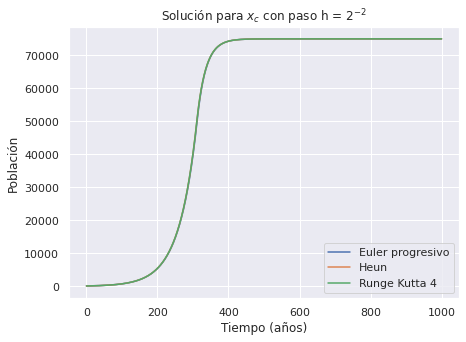

In [92]:
# Solución con Euler progresivo y paso h3
I_Euler_3, X_Euler_3 = Euler_prog(F1, 0, 1000, X0, h3, args)
# Solución con Heun y paso h3
I_Heun_3, X_Heun_3 = Heun(F1, 0, 1000, X0, h3, args)
# Solución con Runge Kutta 4 y paso h3
I_RK4_3, X_RK4_3 = RK4(F1, 0, 1000, X0, h3, args)


# Gráfico de las soluciones Euler, Heun y RK4 con paso h3

# Tamaño de la figura
plt.figure(figsize=(7,5))


# Gráfico solo para x con respecto al tiempo de cada variable
plt.plot(I_Euler_3,X_Euler_3[:,0], label="Euler progresivo")
plt.plot(I_Heun_3,X_Heun_3[:,0], label="Heun")
plt.plot(I_RK4_3,X_RK4_3[:,0], label="Runge Kutta 4")

# Título
plt.title("Solución para $x_c$ con paso h = $2^{-2}$")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

In [93]:
# Solución con Runge Kutta 4 y paso temporal 2^-8
I_RK4_4, X_RK4_4 = RK4(F1, 0, 1000, X0, pow(2,-8), args)

x_ref = X_RK4_4


# Errores absolutos
print("Error Euler progresivo, comparación h = 1 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_Euler_1)))] - X_Euler_1))
print("Error Euler progresivo, comparación h = 2^-1 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_Euler_2)))] - X_Euler_2))
print("Error Euler progresivo, comparación h = 2^-2 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_Euler_3)))] - X_Euler_3))

print("Error Heun, comparación h = 1 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_Heun_1)))] - X_Heun_1))
print("Error Heun, comparación h = 2^-1 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_Heun_2)))] - X_Heun_2))
print("Error Heun, comparación h = 2^-2 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_Heun_3)))] - X_Heun_3))

print("Error Runge Kutta 4, comparación h = 1 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_RK4_1)))] - X_RK4_1))
print("Error Runge Kutta 4, comparación h = 2^-1 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_RK4_2)))] - X_RK4_2))
print("Error Runge Kutta 4, comparación h = 2^-2 y h = 2^-8 :", np.linalg.norm(x_ref[range(0,len(x_ref)-1,int(len(x_ref)/len(X_RK4_3)))] - X_RK4_3))

Error Euler progresivo, comparación h = 1 y h = 2^-8 : 17502.430181172793
Error Euler progresivo, comparación h = 2^-1 y h = 2^-8 : 12401.273927909275
Error Euler progresivo, comparación h = 2^-2 y h = 2^-8 : 8774.169972965752
Error Heun, comparación h = 1 y h = 2^-8 : 140.44688915373808
Error Heun, comparación h = 2^-1 y h = 2^-8 : 51.75469961169441
Error Heun, comparación h = 2^-2 y h = 2^-8 : 16.60375827239473
Error Runge Kutta 4, comparación h = 1 y h = 2^-8 : 1.9030687270326738
Error Runge Kutta 4, comparación h = 2^-1 y h = 2^-8 : 2.2059222478819103
Error Runge Kutta 4, comparación h = 2^-2 y h = 2^-8 : 0.2663595095154115


# Parte 2: Sociedad sin elites

Para esta parte, resolveremos el siguiente sistema de ecuaciones diferenciales ordinarias correspondiente a tres de las cuatro variables del modelo de humanidad-naturaleza:

\begin{eqnarray*}
\frac{dx_c}{dt}&=&b_1 x_c - a_1 x_c\cr
\frac{dy}{dt}&=&r y (L-y) - D x_c y\cr
\frac{da}{dt}&=&D x_c y -  C_C - C_E
\end{eqnarray*}

## P2.a Programar función de lado derecho, considerando $x_E \equiv 0$ .

In [94]:
# Constante definida por enunciado
xe = 0

# Función del lado derecho
def F2(t,X,args):
    # Desempaquetamiento de las condiciones iniciales y constantes
    xc, y, a = X 
    aS, aH, b1, b2, s, p, r, L, xe, k, D = args

    # Funciones auxiliares necesarias para el calculo de las derivadas
    A1 = a1(aS, s, xc, aH, a, p, xe, k)
    CC = Cc(s, xc, a, ac, p, xe, k)
    CE = Ce(s, xc, a, ac, p, xe, k)

    # Calculamos las derivadas
    dxc = b1*xc - A1*xc
    dy =  r*y*(L - y) - D*xc*y
    da = D*xc*y - CC - CE

    return np.array([dxc, dy, da])

## P2.b.1 Constantes y valores a ocupar para las soluciones

In [95]:
# Constantes definidas por el enunciado
e = (aH - b1)/(aH - aS)

D_Rayita = (2*e*s)/(L)

D = D_Rayita

Chi = (r/D)*(L-(e*(s/D)))

Chi_Opt = (r*L)/(2*D_Rayita)

# Todas las constantes y condiciones iniciales que se vayan a utilizar enpaquetada en una lista
args = [aS, aH, b1, b2, s, p, r, L, xe, k, D]
X0 = [xc0, y0, a0]

Para demostrar que existe un $\hat{D}$ para el cual se maximiza $\chi$, primero debemos derivar $\chi$ con respecto a $D$, y esta derivada la igualamos a 0 para luego despejar el valor de $D$. 
$$\chi = \frac{r}{D}\left(L-e\frac{s}{D}\right)$$

Derivamos $\chi$ con respecto a $D$:
$$\implies
\frac{d\chi}{dD} = \frac{d}{dD}(\frac{r}{D})\cdot(L-e\frac{s}{D})+\frac{r}{D}\frac{d}{dD}(L-e\frac{s}{D})$$
$$\Longleftrightarrow
\frac{-r}{D^2}\cdot(L-e\frac{s}{D})+\frac{r}{D}\cdot\frac{es}{D^2}$$
$$\Longleftrightarrow
\frac{-rL}{D^2} + \frac{ers}{D^3} + \frac{ers}{D^3}$$
$$\Longleftrightarrow
\frac{-rL}{D^2} + 2\frac{ers}{D^3}$$

Igualamos a 0 para despejar $D$:
$$\implies
-rLD + 2e \cdot rs = 0$$
$$\Longleftrightarrow
-LD + 2e \cdot s = 0$$
$$\implies
D = \frac{2e \cdot s}{L}$$
Donde $D = \hat{D}$

Ahora debemos derivar por segunda vez $\chi$ con respecto a $D$

$$\frac{d^2\chi}{dD^2} = \frac{d}{dD}(\frac{-rL}{D^2}) + \frac{d}{dD}(2\frac{ers}{D^3})$$
$$\Longleftrightarrow
\frac{2rL}{D^3}-6\frac{ers}{D^4}$$

Ahora si reemplazamos el valor de $\hat{D}$ en $\frac{2rL}{D^3}-6\frac{ers}{D^4}$, su resultado será menor a 0, por lo que es un punto máximo.

Utilizando $\hat{D}$ en $\chi$, podemos calcular el valor de la carga límite óptima.

$$\chi = \frac{r}{D}(L-e\frac{s}{D})$$
$$\Longleftrightarrow
\frac{rL}{2es}(L-e\frac{sL}{2es})$$
$$\Longleftrightarrow
\frac{rL^2}{2es}-\frac{resL^2}{4e^{2}s^{2}}$$
$$\Longleftrightarrow
\frac{rL^2}{2es}-\frac{rL^2}{4es}$$
$$\Longleftrightarrow
\frac{2rL^{2}-rL^{2}}{4es} = \frac{rL^{2}}{4es} = \frac{rL}{2} \cdot \frac{L}{2e \cdot s} = \frac{rL}{2\hat{D}}$$

Donde $\chi_M = \frac{rL}{2\hat{D}}$

## P2.b.2 Implementar un método a elección, en este caso Euler progresivo.

En este caso, para calcular la solución, el valor del paso h es el mismo utilizado anteriormente h = 1.

In [96]:
# Función para implementar Euler progresivo.
def Euler_progP2(F2,ti,tf,X0,h,args):
    N = int((tf-ti)/h)  

    I = np.linspace(ti,tf,N)  

    X = np.zeros((N,len(X0)))

    X[0] = X0   

    for i in range(N-1):
        X[i+1] = X[i] + h*F2(I[i],X[i],args) 

    return (I,X) 

In [97]:
# Solución con Euler progresivo
I_EP, X_EP = Euler_progP2(F2,0,1000,X0,h,args)

## P2.b.3 Graficar las solución con Euler progresivo y h = 1. Amplificando $y$ por $8L$ y $a$ por $2L$.

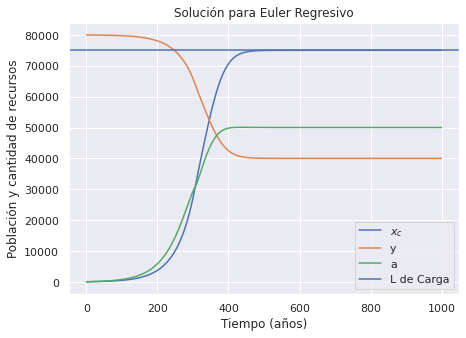

In [98]:
# Tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
# donde los valores de y, a son amplificados por 8L y 2L respectivamente
plt.plot(I_EP,X_EP[:,0], label="$x_c$")
plt.plot(I_EP,8*L*X_EP[:,1], label="y")
plt.plot(I_EP,2*L*X_EP[:,2], label="a")
plt.axhline(Chi, label="L de Carga")

# Título
plt.title("Solución para Euler Regresivo")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")
# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

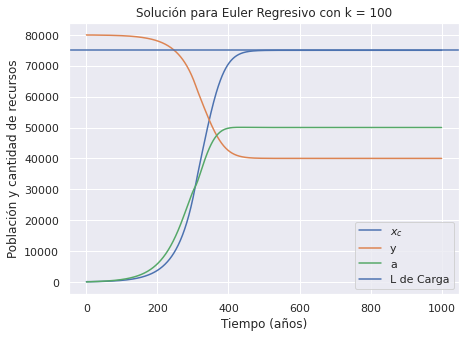

In [99]:
# Nuevo valor de k
k = 100

# Reemplazar este nuevo k en nuestra lista
args[9] = k

# Solución con Euler progresivo
I_EP, X_EP2 = Euler_progP2(F2,0,1000,X0,h,args)

# Tamaño de la figura
plt.figure(figsize=(7,5))

# Gráficos, donde los valores de y, a son amplificados por 8L y 2L respectivamente
plt.plot(I_EP,X_EP2[:,0], label="$x_c$")
plt.plot(I_EP,8*L*X_EP2[:,1], label="y")
plt.plot(I_EP,2*L*X_EP2[:,2], label="a")
plt.axhline(Chi, label="L de Carga")

# Título
plt.title("Solución para Euler Regresivo con k = 100")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

## P2.b.4 Describir los gráficos y como se ve afectado al cambiar el valor de k

Podemos notar un crecimiento logístico para la población común, y tambien de los alimentos, pero podemos ver que la taza de crecimiento disminuye a medida que la población alcanza su tamaño máximo, el cual no supera el limite de carga. Podemos ver tambien que la naturaleza tiene una bajada, pero este llega a un equilibrio.

Lo que podemos observar al momento de cambiar el valor de $k$, es que independientemente de cambiar este valor, los graficos no se ven modificados, esto porque definimos $x_E \equiv 0$, por lo que, al no existir la poblacion de la élite, no hay un factor de desigualdad $k$ entre la gente común y la élite.

## P2.c Utilizando $D = 5.5\hat{D}$, resolvemos con un solver y lo graficamos. Ademas de agregar un parámetro rtol, con un valor inicial de $10^{-3}$.

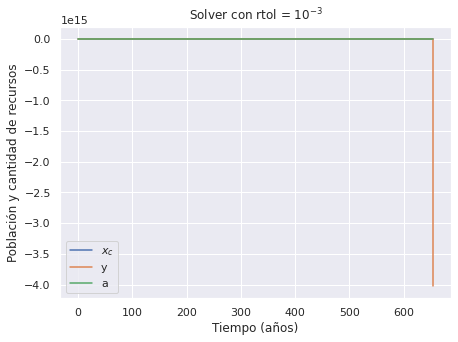

In [100]:
# Cambio de valor de k, como antes tenía valor de 100
k = 1

# Reemplazar este nuevo k en nuestra lista
args[9] = k

# Cambio de valor para D
D = 5.5*D_Rayita

# Reemplazar este nuevo D en nuestra lista
args[10] = D

# Variable para guardar el valor de solve_ivp
sol = solve_ivp(F2, (0,1000), X0, rtol = pow(10,-3), args = (args,))

# Diccionario con los intervalos y solución de la variable sol
I, X = sol["t"], sol["y"]
xc, y, a = X[0], L*X[1], L*X[2]

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
plt.plot(I,xc, label="$x_c$")
plt.plot(I,y, label="y")
plt.plot(I,a, label="a")

# Título
plt.title("Solver con rtol = $10^{-3}$")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

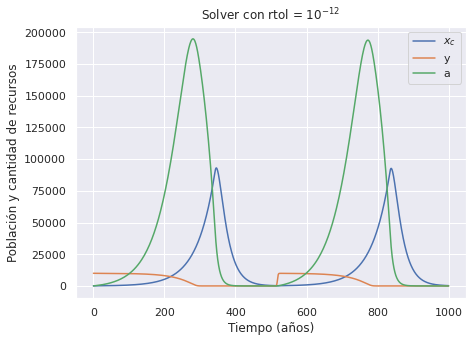

In [101]:
# Variable para guardar el valor de solve_ivp
sol2 = solve_ivp(F2, (0,1000), X0, rtol = pow(10,-12), args = (args,))

# Diccionario con los intervalos y solución de la variable sol
I, X = sol2["t"], sol2["y"]
xc, y, a = X[0], L*X[1], L*X[2]

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
plt.plot(I,xc, label="$x_c$")
plt.plot(I,y, label="y")
plt.plot(I,a, label="a")

# Título
plt.title("Solver con rtol = $10^{-12}$")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

### Describir lo que ocurren con $rtol = 10^{-3}$ y $rtol = 10^{-12}$

Al momento de utilizar rtol como $10^{-3}$, el gráfico que se genera no es muy bueno, se puede ver que no presenta muchos errores, y no hay mucha precisión, pero al momento de ir disminuyendo este valor, podemos ver que que la solución es cada vez mejor, ya que existen menos errores en el calculo para los solvers. Por ende en rtol = $10^{-12}$ presenta mejores resultados.

# Parte 3: Sociedad igualitaria

Ahora como $x_E \equiv 0$m, se puede obtener un sistema de cuatro variables del modelo de humanidad-naturaleza:

\begin{eqnarray*}
\frac{dx_c}{dt}&=&b_1 x_c - a_1 x_c\cr
\frac{dx_E}{dt}&=&b_2 x_E - a_2 x_E\cr
\frac{dy}{dt}&=&r y (L-y) - D x_c y\cr
\frac{da}{dt}&=&D x_c y -  C_C - C_E
\end{eqnarray*}

## P3.a Calcular la función del lado derecho, utilizando las cuatro variables del modelo.

In [102]:
# Condiciones iniciales definidas por enunciado
xe0 = 25

# Constante definidas por enunciado
k = 1

# Función del lado derecho
def F3(t,X,args): 
    # Desempaquetamiento de las condiciones iniciales y constantes
    xc, xe, y, a = X 
    aS, aH, b1, b2, s, p, r, L, k, D = args

    # Funciones auxiliares necesarias para el calculo de las derivadas
    A1 = a1(aS, s, xc, aH, a, p, xe, k)
    A2 = a2(aS, s, xc, aH, a, p, xe, k)
    CC = Cc(s, xc, a, ac, p, xe, k)
    CE = Ce(s, xc, a, ac, p, xe, k)

    # Calculamos las derivadas
    dxc = b1*xc - A1*xc
    dxe = b2*xe - A2*xe
    dy =  r*y*(L - y) - D*xc*y
    da = D*xc*y - CC - CE

    return np.array([dxc, dxe, dy, da])

## P3.b.1 Constantes y valores a ocupar para las soluciones, además de calcular y graficar la soluciones con el metodo a elección, en este caso con Euler progresivo. Amplificando $y$ por $8L$ y $a$ por $2L$.

In [103]:
# Constantes definidas por el enunciado
Phi = xe0/xc0

e = (aH - b1)/(aH - aS)

D_tilde = ((2*e*s)/(L))*(1+Phi)

D = D_tilde

Chi = (r/D)*(L-(e*(s/D)*(1+Phi)))*(1+Phi)

Chi_Opt = (Phi+1)*((r*L)/(2*D_tilde))

# Todas las condiciones iniciales y constantes que se vayan a utilizar enpaquetada en una lista
args = [aS, aH, b1, b2, s, p, r, L, k, D]
X0 = [xc0, xe0, y0, a0]

Para demostrar que existe un $\hat{D}$ para el cual se maximiza este nuevo $\chi$, con $\varphi = \frac{x_E(0)}{x_c(0)}$, primero debemos derivar $\chi$ con respecto a $D$, y esta derivada la igualamos a 0 para luego despejar el valor de $D$.
$$\chi = \frac{r}{D}\left(L-e\frac{s}{D}(1+\varphi)\right)(1+\varphi)$$
$$\implies
\chi = \frac{r}{D}\left(L(1+\varphi)-e\frac{s}{D}(1+\varphi)^{2}\right)$$

Derivamos este nuevo $\chi$ con respecto a $D$:

$$\implies
\frac{d\chi}{dD} = \frac{d}{dD}(\frac{r}{D})\cdot\left(L(1+\varphi)-e\frac{s}{D}(1+\varphi)^{2}\right)+\frac{r}{D}\frac{d}{dD}\left(L(1+\varphi)-e\frac{s}{D}(1+\varphi)^{2}\right)$$
$$\Longleftrightarrow
\frac{-r}{D^2}\cdot\left(L(1+\varphi)-e\frac{s}{D}(1+\varphi)^{2}\right)+\frac{r}{D}\cdot\frac{es}{D^2}(1+\varphi)^{2}$$
$$\Longleftrightarrow
\frac{-rL(1+\varphi)}{D^2} + \frac{ers(1+\varphi)^{2}}{D^3} + \frac{ers(1+\varphi)^{2}}{D^3}$$
$$\Longleftrightarrow
\frac{-rL(1+\varphi)}{D^2} + 2\frac{ers(1+\varphi)^{2}}{D^3}$$

Igualamos a 0 para despejar $D$:

$$\implies
-rLD(1+\varphi) + 2e \cdot rs(1+\varphi)^{2} = 0$$
$$\Longleftrightarrow
-LD(1+\varphi) + 2e \cdot s(1+\varphi)^{2} = 0$$
$$\implies
D = \frac{2e \cdot s}{L}(1+\varphi)$$
Donde $D = \tilde{D}$

Ahora debemos derivar por segunda vez $\chi$ con respecto a $D$

$$\frac{d^2\chi}{dD^2} = \frac{d}{dD}\left(\frac{-rL(1+\varphi)}{D^2}\right) + \frac{d}{dD}\left(2\frac{ers(1+\varphi)^{2}}{D^3}\right)$$
$$\Longleftrightarrow
\frac{2rL(1+\varphi)}{D^3}-6\frac{ers(1+\varphi)^{2}}{D^4}$$

Ahora si reemplazamos el valor de $\hat{D}$ en $\frac{2rL(1+\varphi)}{D^3}-6\frac{ers(1+\varphi)^{2}}{D^4}$, su resultado será menor a 0, por lo que es un punto máximo.

Utilizando $\hat{D}$ en $\chi$, podemos calcular el valor de la carga límite óptima.

$$\chi = \frac{r}{D}\left(L-e\frac{s}{D}(1+\varphi)\right)(1+\varphi)$$
$$\Longleftrightarrow
\frac{rL}{2es(1+\varphi)}\left(L-e\frac{sL}{2es(1+\varphi)}(1+\varphi)\right)(1+\varphi)$$
$$\Longleftrightarrow
\frac{rL}{2es(1+\varphi)}\left(L(1+\varphi)-e\frac{sL}{2es}(1+\varphi)\right)$$
$$\Longleftrightarrow
\frac{rL^2}{2es}-\frac{esL^2}{4e^{2}s^{2}}$$
$$\Longleftrightarrow
\frac{rL^2}{2es}-\frac{L^2}{4es}$$
$$\Longleftrightarrow
\frac{2rL^{2}-rL^{2}}{4es} = \frac{rL^{2}(1+\varphi)}{4es(1+\varphi)} = \frac{rL(1+\varphi)}{2} \cdot \frac{L}{2e \cdot s(1+\varphi)} = \frac{rL}{2\tilde{D}}$$

Donde $\chi_M = (1+\varphi)\frac{rL}{2\tilde{D}}$

In [104]:
# Función para implementar Euler progresivo.
def Euler_progP3(F3,ti,tf,X0,h,args):
    N = int((tf-ti)/h)  

    I = np.linspace(ti,tf,N)  

    X = np.zeros((N,len(X0)))

    X[0] = X0   

    for i in range(N-1):
        X[i+1] = X[i] + h*F3(I[i],X[i],args) 

    return (I,X) 

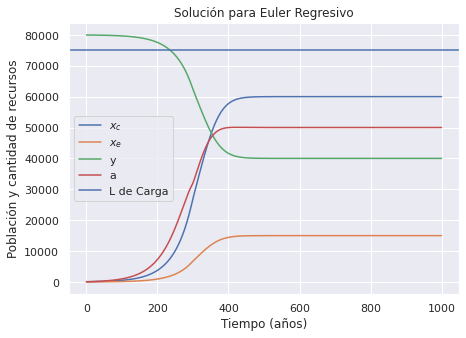

In [105]:
# Solución con Euler progresivo
I_EP, X_EP = Euler_progP3(F3,0,1000,X0,h,args)

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
# donde los valores de y, a son amplificados por 8L y 2L respectivamente
plt.plot(I_EP,X_EP[:,0], label="$x_c$")
plt.plot(I_EP,X_EP[:,1], label="$x_e$")
plt.plot(I_EP,8*L*X_EP[:,2], label="y")
plt.plot(I_EP,2*L*X_EP[:,3], label="a")
plt.axhline(Chi, label="L de Carga")

# Título
plt.title("Solución para Euler Regresivo")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

## P3.b.2 Describir el gráfico

Podemos notar un crecimiento logístico para la población ya sea común como élite, y tambien de los alimentos, pero podemos ver que la taza de crecimiento disminuye a medida que la población alcanza su tamaño máximo, también podemos ver que la población común, no se acerca tanto al limite de carga como lo hizo en el caso donde la élite era igual a 0, esto puesto que la población de la élite ahora consumen parte de los recursos generados.

## P3.c Repitir el procedimiento de los solvers de la parte 2 pero con $D = 5\tilde{D}$. Amplificando $y$ por $8L$ y $a$ por $L/2$.

In [106]:
# Cambio de valor para D
D = 5*D_tilde

# Reemplazar este nuevo D en nuestra lista
args[9] = D

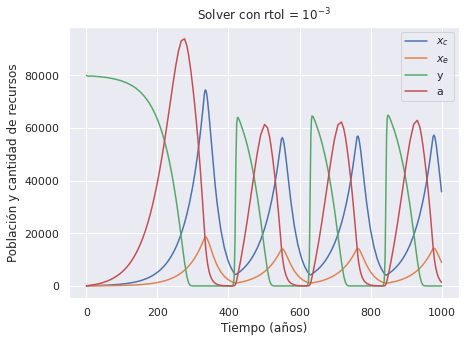

In [107]:
# Variable para guardar el valor de solve_ivp
sol1 = solve_ivp(F3, (0,1000), X0, rtol = pow(10,-3), args = (args,))

# Diccionario con los intervalos y solución de la variable sol
# donde los valores de y, a son amplificados por 8L y L/2 respectivamente
I, X = sol1["t"], sol1["y"]
xc, xe, y, a = X[0], X[1], 8*L*X[2], (L/2)*X[3]

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo
plt.plot(I,xc, label="$x_c$")
plt.plot(I,xe, label="$x_e$")
plt.plot(I,y, label="y")
plt.plot(I,a, label="a")

# Título
plt.title("Solver con rtol = $10^{-3}$")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

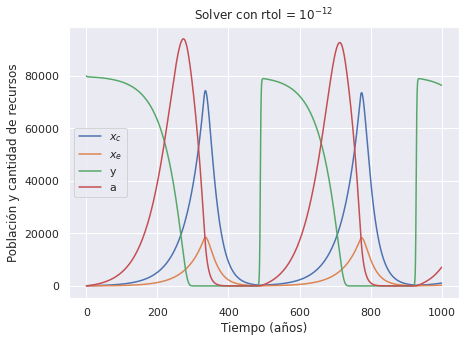

In [108]:
# Variable para guardar el valor de solve_ivp
sol2 = solve_ivp(F3, (0,1000), X0, rtol = pow(10,-12), args = (args,))

# Diccionario con los intervalos y solución de la variable sol
# donde los valores de y, a son amplificados por 8L y L/2 respectivamente
I, X = sol2["t"], sol2["y"]
xc, xe, y, a = X[0], X[1], 8*L*X[2], (L/2)*X[3]

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo
plt.plot(I,xc, label="$x_c$")
plt.plot(I,xe, label="$x_e$")
plt.plot(I,y, label="y")
plt.plot(I,a, label="a")

# Título
plt.title("Solver con rtol = $10^{-12}$")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

### Describir lo que ocurren con $rtol = 10^{-3}$ y $rtol = 10^{-12}$

Al momento de utilizar rtol como $10^{-3}$, podemos notar que existe un comportamiento ciclico, donde cada curva presenta máximos periódicos, esto porque existe un desfase en el tiempo para la población y los recursos, como se puede ver al momento de obtener alimento, el valor de la naturaleza disminuye, mientras que la población ya sea común como élite aumenta, pero se llega un punto donde llega a su máximo y comienzan a disminuir todos los valores, hasta que comienza el ciclo nuevamente. Lo mismo se puede ver para rtol = $10^{-12}$, pero con una mayor precisión. 

# Parte 4: Sociedad desigual

## P4.a.1 Constantes y valores a ocupar para las soluciones, además de calcular y graficar la soluciones con el metodo a elección, en este caso con Euler progresivo, con intervalo entre 0 y 1000 años, $k = 10$ y $D = 6.35*10^{-6}$. Amplificando $a$ por $L/2$


In [109]:
# Un k >> 1
k = 10

# Constantes definidas por enunciado
D = 6.35*pow(10,-6)

# Todas las condiciones iniciales y constantes que se vayan a utilizar enpaquetada en una lista
args = [aS, aH, b1, b2, s, p, r, L, k, D]
X0 = [xc0, xe0, y0, a0]

# Como las variables son las mismas a la parte anterior, no hay necesidad de escribir la función del lado derecho

# Función para implementar Euler progresivo.
def Euler_progP4(F3,ti,tf,X0,h,args):
    N = int((tf-ti)/h)  

    I = np.linspace(ti,tf,N)  

    X = np.zeros((N,len(X0)))

    X[0] = X0   

    for i in range(N-1):
        X[i+1] = X[i] + h*F3(I[i],X[i],args) 

    return (I,X)

In [110]:
# Solución con Euler progresivo
I_EP, X_EP = Euler_progP4(F3,0,1000,X0,h,args)

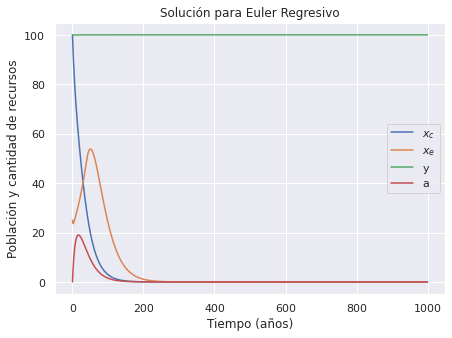

In [111]:
# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
# donde los valores de a son amplificados por L/2
plt.plot(I_EP,X_EP[:,0], label="$x_c$")
plt.plot(I_EP,X_EP[:,1], label="$x_e$")
plt.plot(I_EP,X_EP[:,2], label="y")
plt.plot(I_EP,(L/2)*X_EP[:,3], label="a")

# Título
plt.title("Solución para Euler Regresivo")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

## P4.a.2 Describir el gráfico

Como se puede ver, en este caso de una sociedad igual, donde la élite consume mucho mas alimento de lo que se puede generar, por lo que la población común no puede generar el alimento suficiente, disminuyendo su población, y como esta disminuye, la élite tambien lo hace.

## P4.b.1 Repetir el procedimiento de la parte anterior, pero ahora con $D = 10^{-4}$. Amplificando $y$ por $8L$ y $a$ por $L/2$.

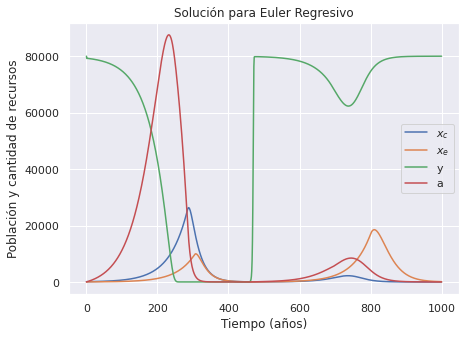

In [112]:
# Cambio de valor para D
D = pow(10,-4)

# Reemplazar este nuevo D en nuestra lista
args[9] = D

# Solución con Euler progresivo
I_EP2, X_EP2 = Euler_progP4(F3,0,1000,X0,h,args)

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo de cada variable
# donde los valores de y, a son amplificados por 8L y L/2 respectivamente
plt.plot(I_EP2,X_EP2[:,0], label="$x_c$")
plt.plot(I_EP2,X_EP2[:,1], label="$x_e$")
plt.plot(I_EP2,8*L*X_EP2[:,2], label="y")
plt.plot(I_EP2,(L/2)*X_EP2[:,3], label="a")

# Título
plt.title("Solución para Euler Regresivo")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población y cantidad de recursos")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

## P4.b.2 Describir el gráfico

Lo que se puede ver y deducir es que ahora se produce mas alimento en comparación a $D = 6.35*10^{-6}$, pero como aun hay mucha gente de élite que consume 10 veces más que la gente común, se ve que la población común debe generar mucho mas alimento, para alimentar toda las personas, pero esto llega a un límite, donde ya no es posible alimentar a toda la población y decrece rápidamente. Durante los siguientes 50-100 años la naturaleza se recupera totalmente, y la población vuelve, pero decae nuevamente durante los años 900.